In [1]:
#################################### Loading Data #####################################
from obspy import read
# The data should be at least 30s (3000 samples of 100 sampling rate),
# and the lenght of the data is multiples of 3000.


st = 'Test40Hz.mseed'
Data = read(st, debug_headers=True)
Data[0].data = Data[0].data[0:14000 ] 
Data[1].data = Data[1].data[0:14000 ] 
Data[2].data = Data[2].data[0:14000 ] 

In [2]:
#################################### Loading model #####################################
from SCALO_Utils import *
filname = 'Detection_final1.h5'
model = load_SCALODEEP_Model(filname)

Using TensorFlow backend.
C:\Users\owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [3]:
# Patching 
w1 =3000
w2 =1
s1z =1000
s2z =1
ch0,ch1,ch2 = Patching(Data,w1,w2,s1z,s2z)



In [8]:
n1 = len(Data[0].data)
n2 = 1
labf = SCALO_Continous_Windows_Overlapping_EvenTime(Data,ch0,ch1,ch2,model,n1,n2,w1,w2,s1z,s2z)

0/12
1/12
2/12
3/12
4/12
5/12
6/12
7/12
8/12
9/12
10/12
11/12
12/12 [==============================] - 1s 75ms/step


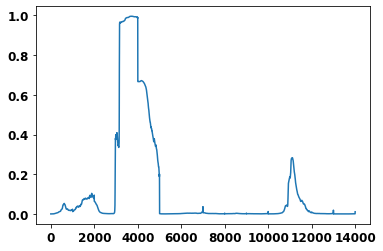

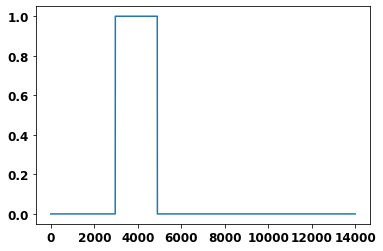

In [9]:
import matplotlib.pyplot as plt

thre = 0.3
labwin = np.where(labf>thre,1,0)

plt.plot(labf[:,0])
plt.figure()
plt.plot(labwin[:,0])

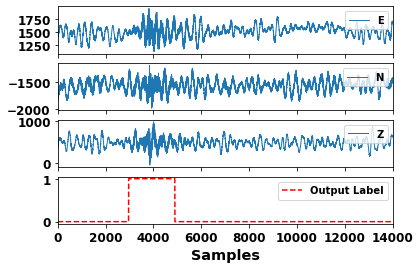

In [10]:
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

fig = plt.figure()
ax1 = plt.subplot(411)
plt.plot(Data[0].data,label = 'E' , linewidth = 1, markersize=1)
ax1.legend(loc='upper right', fontsize = 10)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_xlim(xmin=0)
ax1.set_xlim(xmax=len(labf))
#plt.title(str(st[0].stats.starttime))

ax2 = plt.subplot(412, sharex=ax1)
plt.plot(Data[1].data, label = 'N' , linewidth = 1, markersize=1)
ax2.legend(loc='upper right', fontsize = 10)
ax2.set_xlim(xmin=0)
ax2.set_xlim(xmax=len(labf))

plt.setp(ax2.get_xticklabels(), visible=False)

# share x only
ax3 = plt.subplot(413, sharex=ax1)
plt.plot(Data[2].data, label = 'Z' , linewidth = 1, markersize=1)
ax3.legend(loc='upper right', fontsize = 10)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.set_xlim(xmin=0)
ax3.set_xlim(xmax=len(labf))


# share x only
ax4 = plt.subplot(414, sharex=ax1)
    #plt.plot(lab,'b--',label = 'Ground Truth')
plt.plot(labwin,'r--',label = 'Output Label')
#plt.xlim(0.01, 5.0)
ax4.legend(loc='best', fontsize = 10)
ax4.set_xlim(xmin=0)
ax4.set_xlim(xmax=len(labf))

ax4.set_xlabel("Samples",fontsize='large', fontweight='bold')
plt.show()

In [13]:
# Starting time of the event.
astart = Data[0].stats.starttime
StartTime = astart + (np.where(labwin==1)[0][0] /Data[0].stats.sampling_rate)
print('The event start time is: ' + str(StartTime))

The event start time is: 2020-02-16T17:03:46.100000Z
